In [3]:
!pip install advertools
!pip install ua_parser
!pip install squarify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 9.3 MB/s eta 0:00:00


In [4]:
import advertools as adv
import pandas as pd
from ua_parser import user_agent_parser
import pyarrow.parquet as pq
import pyarrow
from ipywidgets import interact
import matplotlib.pyplot as plt
import ua_parser
pd.options.display.max_columns = None
import squarify

In [8]:
%%time
adv.logs_to_df(
    log_file='log_file.log',
    output_file='output_file.parquet',
    errors_file='errors_file.txt',
    log_format='combined')

Parsed           6,001 lines.
CPU times: user 87.6 ms, sys: 31.5 ms, total: 119 ms
Wall time: 191 ms


3.1 converting it into parquet form as the data is very large, this extension will make our work easy

3.2 correcting the format of our datetime, to standard format.

In [11]:
logs_df = pd.read_parquet('output_file.parquet')
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'],
                                     format='%d/%b/%Y:%H:%M:%S %z')

4. Before, working in data we should get/ collect information about the data. This help us to get clear understanding of our data.

In [12]:
with open('log_file.log', 'r') as file:
    for i in range(7):  # Display the first 10 lines
        print(file.readline())

87.116.74.253 - - [28/Feb/2022:14:04:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.109 Safari/537.36"

91.196.124.220 - - [28/Feb/2022:14:04:47 +0200] "POST /wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625" "WordPress/5.9.1; https://nargile.bg"

91.196.124.220 - - [28/Feb/2022:14:06:45 +0200] "POST /wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000" "WordPress/5.9.1; https://nargile.bg"

87.116.74.253 - - [28/Feb/2022:14:06:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (

In [13]:
file_path = 'log_file.log'

with open(file_path, 'r') as file:
    row_count = sum(1 for _ in file)

print(f"Number of rows in the file: {row_count}")

Number of rows in the file: 39229


In [14]:
print(logs_df.describe())
print("-----------^^^^^^^^^^--------")
print(logs_df.info())

               size
count  5.529000e+03
mean   4.024955e+04
std    7.377386e+04
min    1.000000e+00
25%    2.869000e+03
50%    1.856500e+04
75%    4.490100e+04
max    1.636838e+06
-----------^^^^^^^^^^--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype                                
---  ------      --------------  -----                                
 0   client      6000 non-null   object                               
 1   userid      6000 non-null   object                               
 2   datetime    6000 non-null   datetime64[ns, pytz.FixedOffset(120)]
 3   method      6000 non-null   category                             
 4   request     6000 non-null   object                               
 5   status      6000 non-null   category                             
 6   size        5529 non-null   float64                              
 7   referer     6000 non-null   object      

In [15]:
host_df = adv.reverse_dns_lookup(logs_df['client'])
host_df.head(5)

,ip_address,count,cum_count,perc,cum_perc,hostname,aliaslist,ipaddrlist,errors
0,46.238.56.74,705,705,0.117500,0.117500,ip-46-238-56-74.home.megalan.bg,,46.238.56.74,None
1,149.62.204.185,551,1256,0.091833,0.209333,None,None,None,[Errno 1] Unknown host
2,212.39.89.183,438,1694,0.073000,0.282333,212-39-89-183.ip.btc-net.bg,,212.39.89.183,None
3,31.211.159.44,421,2115,0.070167,0.352500,None,None,None,[Errno 1] Unknown host
4,94.155.70.230,366,2481,0.061000,0.413500,94-155-70-230.ip.btc-net.bg,,94.155.70.230,None


IP Addresses who have maximum frequency .

In [16]:
#Calculate the top visitors by counting unique client IP addresses
top_visitors = logs_df['client'].value_counts().head(10)

# Calculate the frequency of requests by counting the occurrences of each request
frequency_of_requests = logs_df['request'].value_counts().head(10)

print("Top Visitors:")
print(top_visitors)

print("\nFrequency of Requests:")
print(frequency_of_requests)

Top Visitors:
46.238.56.74       705
149.62.204.185     551
212.39.89.183      438
31.211.159.44      421
94.155.70.230      366
79.100.228.118     295
84.54.149.165      290
149.62.204.221     260
85.196.152.186     253
109.199.247.195    216
Name: client, dtype: int64

Frequency of Requests:
/wp-content/uploads/2021/05/HLGN-Logo.png                            107
/?wc-ajax=get_refreshed_fragments                                     56
/wp-admin/admin-ajax.php                                              51
/                                                                     47
/?nitroWebhook=cache_ready&token=fdccd0f43d6699b0ad7852228297d999     30
/category/nargileta/                                                  25
/wp-includes/js/jquery/ui/core.min.js?ver=1.13.1                      18
/wp-includes/js/jquery/ui/menu.min.js?ver=1.13.1                      17
/wp-includes/js/mediaelement/wp-mediaelement.min.css?ver=5.9.1        17
/wp-includes/js/jquery/ui/autocomplete.min.js?ve

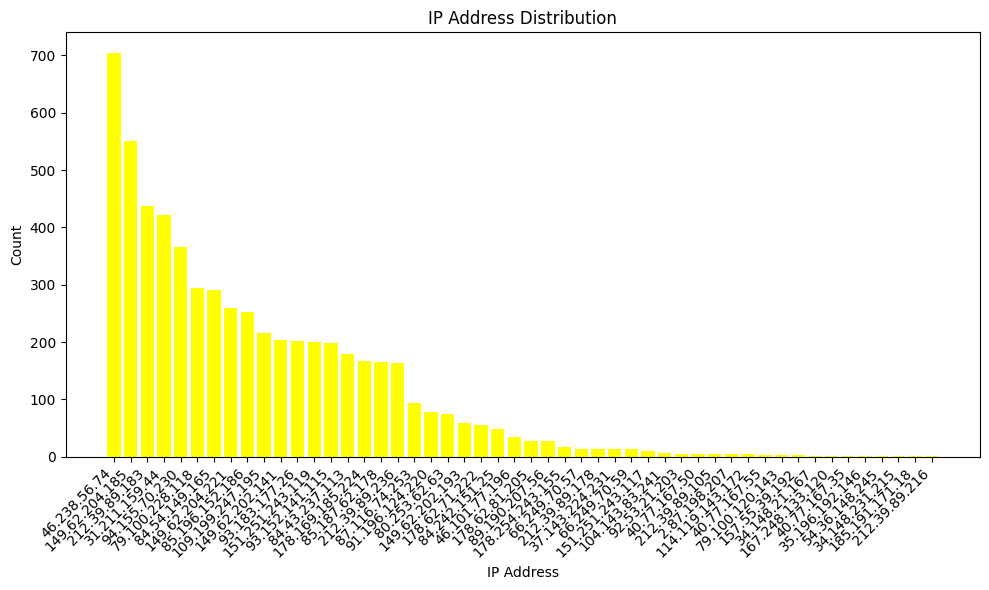

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(host_df['ip_address'].head(50), host_df['count'].head(50), color='yellow')
plt.xlabel('IP Address')
plt.ylabel('Count')
plt.title('IP Address Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

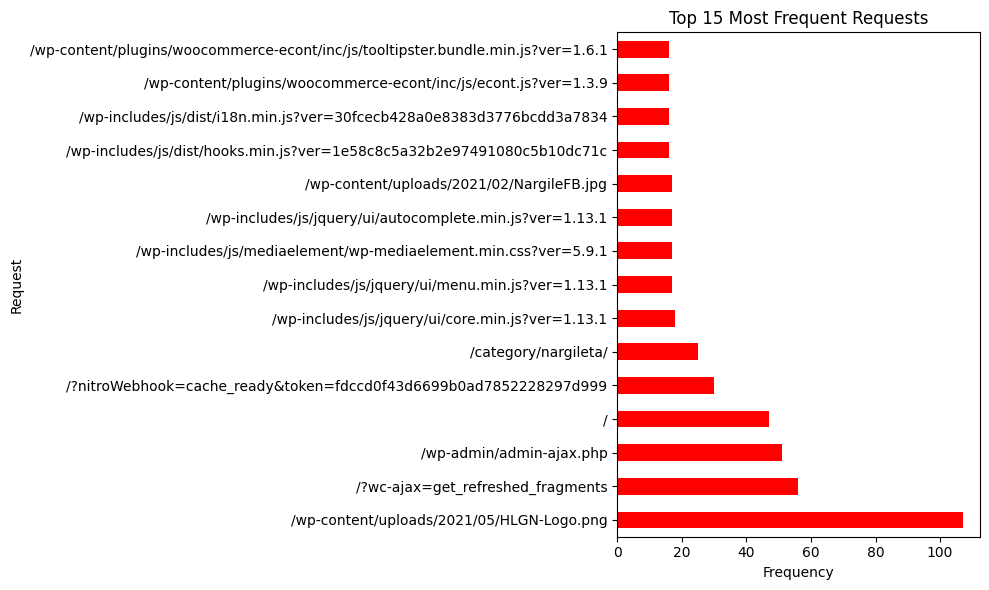

In [23]:
# Calculate the frequency of requests by counting the occurrences of each request
frequency_of_requests = logs_df['request'].value_counts().head(15)
# Plot the data using a bar plot
plt.figure(figsize=(10, 6))
frequency_of_requests.plot(kind='barh', color='red')
plt.ylabel('Request')
plt.xlabel('Frequency')
plt.title('Top 15 Most Frequent Requests')
plt.tight_layout()
plt.show()

  status  count
0    200   5511
1    301     32
2    302      5
3    304    289
4    401      3
5    403      1
6    404    136
7    406     11
8    500     12


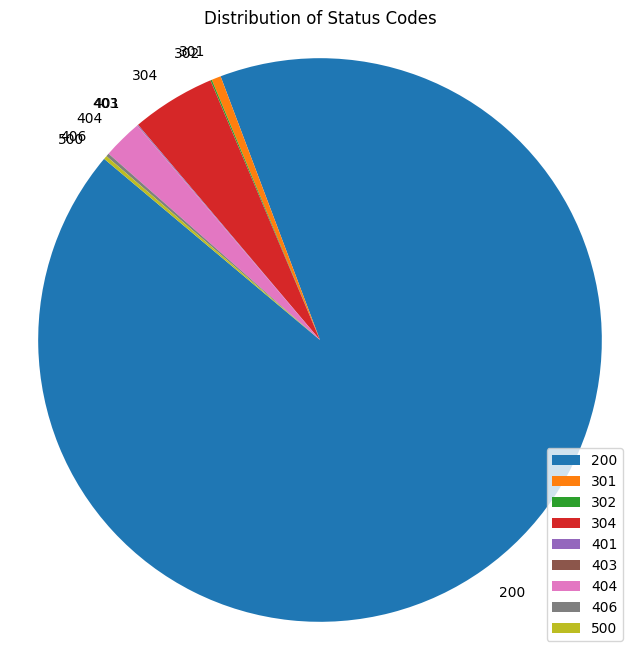

In [24]:
status_df = logs_df.groupby('status').size().reset_index(name='count')
print(status_df)
# Plot the data using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_df['count'], labels=status_df['status'], startangle=140)
plt.title('Distribution of Status Codes')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

            client  hour  request_count
0   104.143.83.241    13              6
1  104.196.146.182    12              1
2    104.196.48.73    12              1
3    104.196.99.35    12              1
4  109.199.247.195    12            216
            client  day_of_week  request_count
0   104.143.83.241            0              6
1  104.196.146.182            0              1
2    104.196.48.73            0              1
3    104.196.99.35            0              1
4  109.199.247.195            0            216


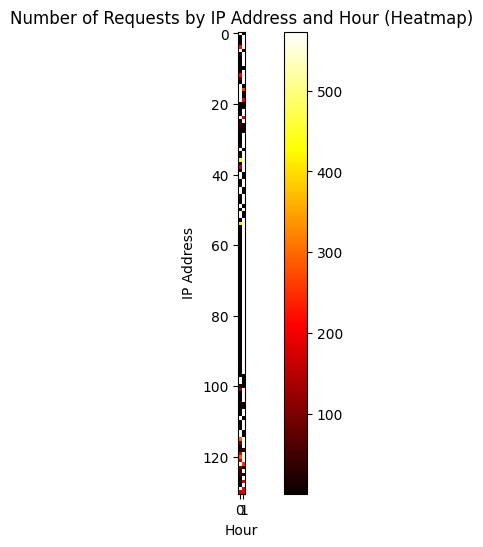

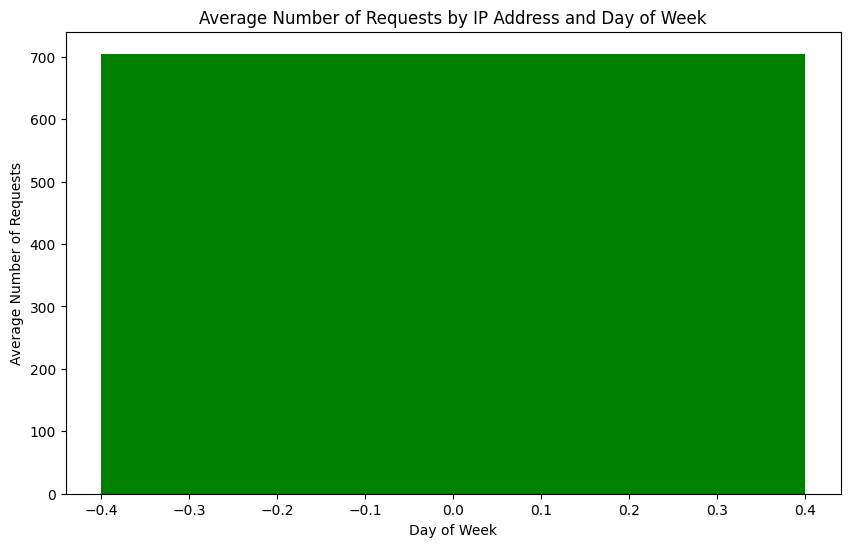

In [25]:
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'])

# Extract hour and day of the week from the "datetime" column
logs_df['hour'] = logs_df['datetime'].dt.hour
logs_df['day_of_week'] = logs_df['datetime'].dt.dayofweek

# Group by IP address and hour, and calculate the count of requests
ip_hourly_counts = logs_df.groupby(['client', 'hour'])['hour'].count().reset_index(name='request_count')

# Group by IP address and day of the week, and calculate the average request count
ip_weekly_avg = logs_df.groupby(['client', 'day_of_week'])['day_of_week'].count().reset_index(name='request_count')

print(ip_hourly_counts.head(5))
print(ip_weekly_avg.head(5))

# Convert the "datetime" column to datetime data type, setting utc=True
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'], utc=True)

# Extract hour and day of the week from the "datetime" column
logs_df['hour'] = logs_df['datetime'].dt.hour
logs_df['day_of_week'] = logs_df['datetime'].dt.dayofweek

# Group by IP address and hour, and calculate the count of requests
ip_hourly_counts = logs_df.groupby(['client', 'hour'])['hour'].count().reset_index(name='request_count')

# Create the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(ip_hourly_counts.pivot_table(index='client', columns='hour', values='request_count', aggfunc=sum), cmap='hot')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('IP Address')
plt.title('Number of Requests by IP Address and Hour (Heatmap)')
plt.colorbar()

# Group by IP address and day of the week, and calculate the average request count
ip_weekly_avg = logs_df.groupby(['client', 'day_of_week'])['day_of_week'].count().reset_index(name='request_count')

# Visualize the weekly average request counts
plt.figure(figsize=(10, 6))
plt.bar(ip_weekly_avg['day_of_week'], ip_weekly_avg['request_count'], color='green')
# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Requests')
plt.title('Average Number of Requests by IP Address and Day of Week')

# Show the plots
plt.show()


In [30]:
!pip install user_agents
import user_agents
from user_agents import parse

   browser  total_hits
0   Chrome        3240
2    Other        1445
3   Safari        1265
1  Firefox          50


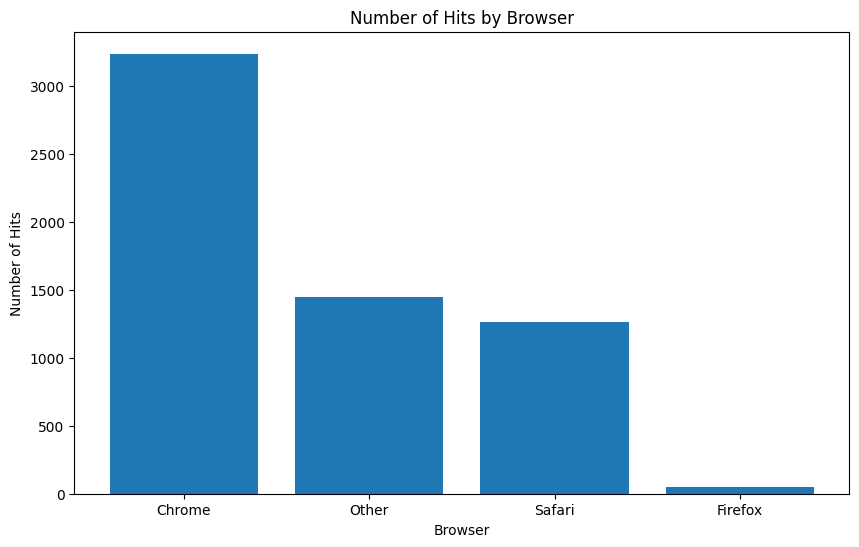

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
# Parse user agents using the user-agents library
def extract_browser(user_agent):
    ua = parse(user_agent)
    browser_family = ua.browser.family.lower()

    if 'chrome' in browser_family:
        return 'Chrome'
    elif 'firefox' in browser_family:
        return 'Firefox'
    elif 'safari' in browser_family:
        return 'Safari'
    elif 'edge' in browser_family:
        return 'Edge'
    elif 'opera' in browser_family:
        return 'Opera'
    elif 'brave' in browser_family:
        return 'Brave'
    elif 'internet explorer' in browser_family or 'msie' in browser_family:
        return 'Internet Explorer'
    else:
        return 'Other'

logs_df['browser'] = logs_df['user_agent'].apply(extract_browser)
# Group data by browser and count hits
browser_hits = logs_df.groupby('browser').size().reset_index(name='total_hits')

# Sort by total hits
browser_hits = browser_hits.sort_values(by=['total_hits'], ascending=False)
print(browser_hits)
# Create a bar chart of the number of hits for each browser
plt.figure(figsize=(10, 6))
plt.bar(browser_hits['browser'], browser_hits['total_hits'])

# Add labels and title
plt.xlabel('Browser')
plt.ylabel('Number of Hits')
plt.title('Number of Hits by Browser')

# Show the plot
plt.show()

site  Unknown  cpcalendars.nargile.bg  cpcontacts.nargile.bg  l.instagram.com  \
hour                                                                            
13       47.0                     1.0                    1.0              NaN   
12      165.0                     NaN                    NaN              4.0   

site  m.abv.bg  m.facebook.com  mail.nargile.bg  nargile.bg  \
hour                                                          
13         NaN             2.0              1.0      2102.0   
12         2.0             4.0              NaN      3644.0   

site  webdisk.nargile.bg  webmail.nargile.bg  www.bing.com  www.google.bg  \
hour                                                                        
13                   1.0                 1.0           NaN            NaN   
12                   NaN                 NaN           1.0            1.0   

site  www.google.com  www.tiktok.com  
hour                                  
13              11.0             1.

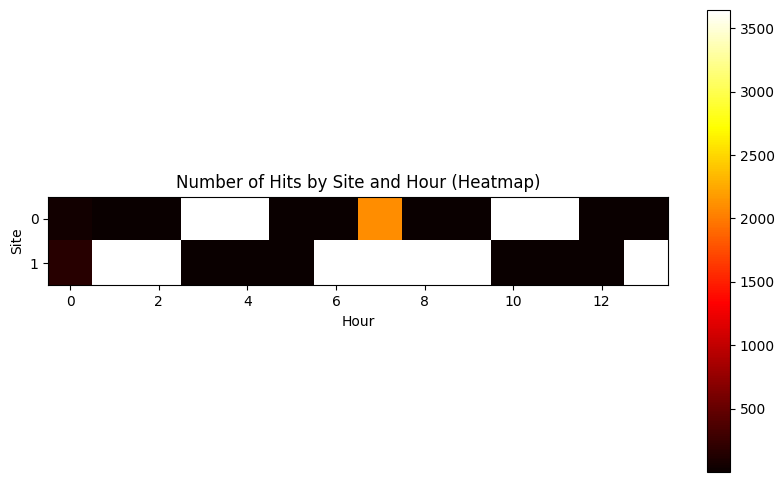

In [32]:
# Parse the referer using the function defined above
def extract_site(referer):
    if pd.isna(referer):
        return 'Direct'
    else:
        referer_parts = referer.split('/')
        if len(referer_parts) >= 3:
            return referer_parts[2]
        else:
            return 'Unknown'

logs_df['site'] = logs_df['referer'].apply(extract_site)

# Group data by site and hour and count hits
site_hourly_hits = logs_df.groupby(['site', 'hour']).size().reset_index(name='hits')

# Pivot the table for site distribution per hour
site_hourly_pivot = site_hourly_hits.pivot(index='hour', columns='site', values='hits')

# Sort by total hits for each hour
site_hourly_pivot = site_hourly_pivot.sort_values(by=['hour'], ascending=False)
print(site_hourly_pivot.head(5))
# Create a heatmap of the number of hits for each site and hour
plt.figure(figsize=(10, 6))
plt.imshow(site_hourly_pivot, cmap='hot')
# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Site')
plt.title('Number of Hits by Site and Hour (Heatmap)')
plt.colorbar()
plt.show()

   hour  total_hits
0    12        3832
1    13        2168


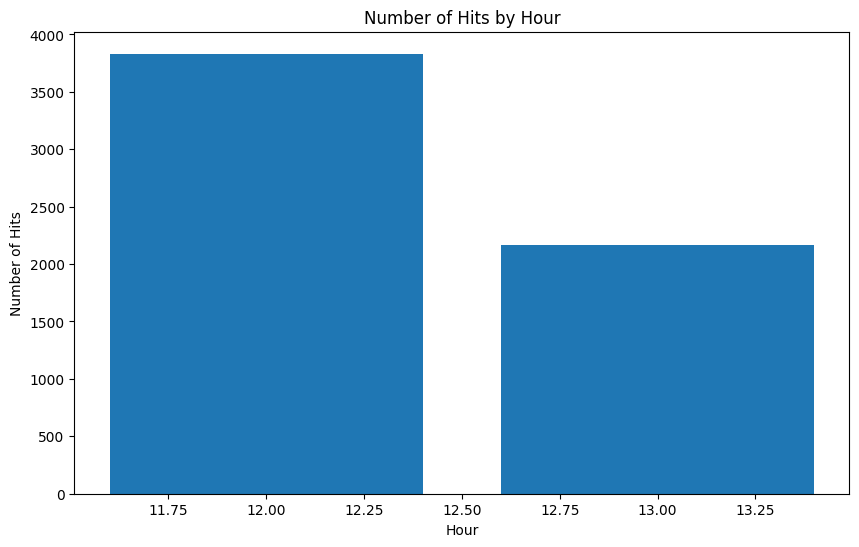

In [33]:
# Group data by hour and count hits
hourly_hits = logs_df.groupby('hour').size().reset_index(name='total_hits')
print(hourly_hits)
# Sort by total hits
#hourly_hits = hourly_hits.sort_values(by=['total_hits'], ascending=False)

# Create a bar chart of the number of hits for each hour
plt.figure(figsize=(10, 6))
plt.bar(hourly_hits['hour'], hourly_hits['total_hits'])

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Number of Hits')
plt.title('Number of Hits by Hour')

# Show the plot
plt.show()

In [34]:
%%time
ua_df = pd.json_normalize([user_agent_parser.Parse(ua) for ua in logs_df['user_agent']])
ua_df.columns = 'ua_' + ua_df.columns.str.replace('user_agent\.', '', regex=True)

CPU times: user 158 ms, sys: 391 µs, total: 158 ms
Wall time: 169 ms


In [35]:
ua_df.head(100)

,ua_string,ua_family,ua_major,ua_minor,ua_patch,ua_os.family,ua_os.major,ua_os.minor,ua_os.patch,ua_os.patch_minor,ua_device.family,ua_device.brand,ua_device.model
0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Chrome,98,0,4758,Mac OS X,10,15,7,None,Mac,Apple,Mac
1,WordPress/5.9.1; https://nargile.bg,WordPress,5,9,1,Other,None,None,None,None,Spider,Spider,Desktop
2,WordPress/5.9.1; https://nargile.bg,WordPress,5,9,1,Other,None,None,None,None,Spider,Spider,Desktop
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Chrome,98,0,4758,Mac OS X,10,15,7,None,Mac,Apple,Mac
4,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,Googlebot,2,1,None,Other,None,None,None,None,Spider,Spider,Desktop
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Chrome,98,0,4758,Windows,10,None,None,None,Other,None,None
96,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Chrome,98,0,4758,Windows,10,None,None,None,Other,None,None
97,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Chrome,98,0,4758,Windows,10,None,None,None,Other,None,None
98,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Chrome,98,0,4758,Windows,10,None,None,None,Other,None,None


In [36]:
import matplotlib.pyplot as plt
import pandas as pd
# Create a new dataframe that only contains the `ua_family` and `ua_os.family` columns
browser_os_df = ua_df[['ua_family', 'ua_os.family']]
# Count the number of occurrences of each browser and operating system combination
browser_os_counts = browser_os_df.groupby(['ua_family', 'ua_os.family']).size().reset_index(name='count')
print(browser_os_counts.head(10))

               ua_family ua_os.family  count
0              AhrefsBot        Other      2
1                 Chrome      Android     17
2                 Chrome     Mac OS X     65
3                 Chrome      Windows   1074
4          Chrome Mobile      Android   1495
5  Chrome Mobile WebView      Android    168
6      Chrome Mobile iOS          iOS    421
7               Facebook      Android    178
8               Facebook          iOS      4
9            FacebookBot        Other     20


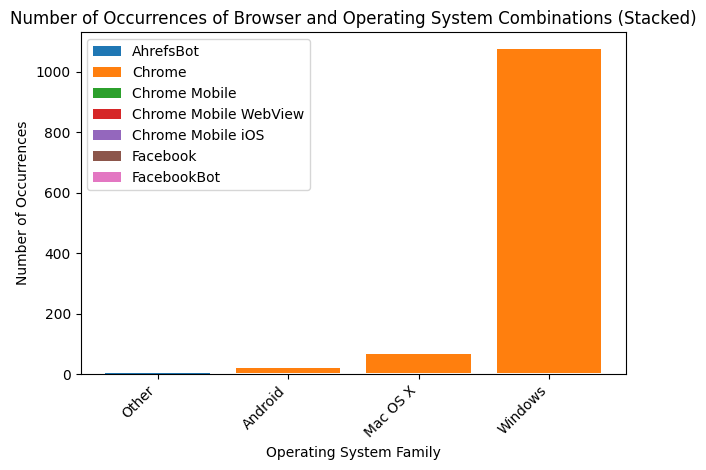

In [37]:
df = browser_os_counts.head(10)

# Get unique browser names for legend
browser_names = df['ua_family'].unique()

# Initialize the bottom for stacking
bottom = None

# Create a stacked bar chart
for browser_name in browser_names:
    browser_data = df[df['ua_family'] == browser_name]
    plt.bar(browser_data['ua_os.family'], browser_data['count'], label=browser_name, bottom=bottom)
    if bottom is None:
        bottom = browser_data['count']
    else:
        bottom += browser_data['count']

# Add labels and title
plt.xlabel('Operating System Family')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Browser and Operating System Combinations (Stacked)')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()